# Introduction to Reinforcement Learning

---

Adapted from the RL Practical session created by **Diana Borsa** for **EEML2019**.


## Tasks


* Policy Evaluation
    - Task 1. [Policy Evaluation agent](#Task1.-Define-your-very-first-Agent!)
    - Task 2. [Greedy Policy Improvement](#Task-2.-Greedy-Policy-Improvement)
* Online Control
    - Task 3. [SARSA Agent](#Task-3.-Implement-a-SARSA-Agent)
    - Task 4. [Q-Learning Agent](#Task-4.-Implement-a-Q-learning-Agent)
    - Bonus!  [Expected SARSA](#Bonus!-Expected-SARSA)

In [1]:
import itertools
from collections import namedtuple
from functools import partial

import matplotlib.pyplot as plt
import numpy as np

from src.grid_world import Grid, AltGrid, Cliff, TMaze
from src.utils import *

# some settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # comment out if puny display

plt.style.use('seaborn-notebook')
plt.style.use('seaborn-whitegrid')
np.set_printoptions(precision=3, suppress=1)

LARGE_PLOT = True # Controls the size of various plots, give it a try.

## First let's look at the environments

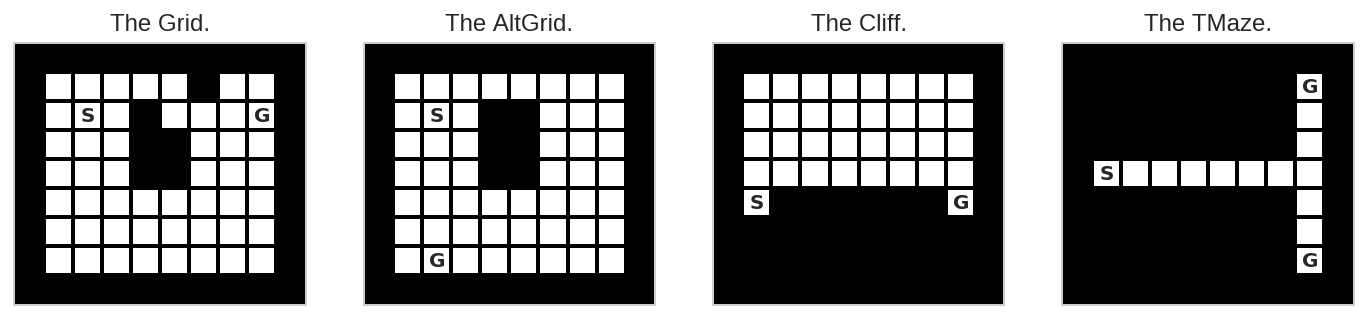

In [2]:
# Instantiate the two tabular environments
envs = [grid() for grid in (Grid, AltGrid, Cliff, TMaze)]

# Plot tabular environments
fig, axes = plt.subplots(1, len(envs), figsize=(12, 4))
for env, ax in zip(envs, axes):
    env.plot_grid(ax=ax)

### Action - Perception loop

In [3]:
# Simple interaction loop with the MDP:
# 1) Interact with the environment
# 2) Agent gets observation, rewards, and discount from env. 
# and is expected to produce the next action
def run_experiment(env, agent, number_of_steps):
    mean_reward = 0.
    try:
        action = agent.initial_action()
    except AttributeError:
        action = 0
      
    # Interaction wih the MDP
    for i in range(number_of_steps):
        reward, discount, next_state = env.step(action)
        action = agent.step(reward, discount, next_state)
        mean_reward += (reward - mean_reward)/(i + 1.)

    return mean_reward

## Part 1. Value Iteration

The purpose here is to evaluate a given policy $\pi$ -- compute the value function assoicated with following/employing this policy in a given MDP.

$$ Q^{\pi}(S,A) = \mathbb{E}_{\tau \sim P^{\pi}} [\sum_t \gamma^t R_t| s_0=s,a=a_0]$$

where $\tau = \{s_0, a_0, r_0, s_1, a_1, r_1, \cdots \}$


Algorithm:

**Initialize** $Q(s, a)$ for all s ∈ $\mathcal{S}$ and a ∈ $\mathcal{A}(s)$

**Loop forever**:

1. $S \gets{}$current (nonterminal) state
 
2. $A \gets{} \text{behaviour_policy}(S)$
 
3. Take action $A$; observe resulting reward $R$, discount $\gamma$, and state, $S'$

4. $Q(S, A) \gets Q(S, A) + \alpha (R + \gamma Q(S', \pi(S')) − Q(S, A))$

### Task1. Define your very first Agent!

In [4]:
# uniformly random policy
def random_policy(q):
    return np.random.randint(4)

In [5]:
class PolicyEval_AGENT(object):

    def __init__(
        self,
        number_of_states,
        number_of_actions,
        initial_state, 
        evaluated_policy, 
        behaviour_policy=random_policy, 
        step_size=0.1
    ):
        self._action = 0
        self._state = initial_state
        self._number_of_states = number_of_states
        self._number_of_actions = number_of_actions
        self._step_size = step_size
        self._behaviour_policy = behaviour_policy
        self._evaluated_policy = evaluated_policy
    
        # ============ YOUR CODE HERE =============
        # initialize your q-values (table of state and action pairs)
        # Note: this can be random. Code was tested w/ zero-initialization 
        self._q = np.zeros(number_of_states, number_of_action)
        pass
    
    @property
    def q_values(self):
        pass

    def step(self, reward, discount, next_state):
        s = self._state
        a = self._action
        r = reward
        g = discount
        next_s = next_state
    
        # ============ YOUR CODE HERE =============
        # Q-value table update
        pass
  
        # Get the action to send to execute in the environment and return it
        pass
  
        return self._action

In [6]:
class PolicyEval_AGENT(object):

    def __init__(
        self,
        number_of_states,
        number_of_actions,
        initial_state,
        evaluated_policy, 
        behaviour_policy=random_policy,
        step_size=0.1
    ): 
        self._q = np.zeros((number_of_states, number_of_actions))
        self._state = initial_state
        self._number_of_states = number_of_states
        self._number_of_actions = number_of_actions
        self._step_size = step_size
        self._behaviour_policy = behaviour_policy
        self._evaluated_policy = evaluated_policy
        self._action = 0
    
    @property
    def q_values(self):
        return self._q

    def step(self, reward, discount, next_state):
        s = self._state
        a = self._action
        r = reward
        g = discount
        next_s = next_state
        next_a = self._evaluated_policy(self._q[next_s])
    
        # Online Q-value update
        td_error = r + g * self._q[next_s, next_a] - self._q[s, a]
        self._q[s, a] += self._step_size * td_error

        # Act
        self._state = next_state
        self._action = self._behaviour_policy(self._q[next_state])
        return self._action

### Value Iteration with random policy

Run the policy evaluation agent, evaluating the uniformly random policy  on
the AltGrid() environment for $\texttt{num_steps} = 1e3, 1e5$. 

Visualise the resulting value functions $Q(s,a)$. Plotting function is
provided for you and it takes in a table of q-values

AFTER 100000 STEPS ...


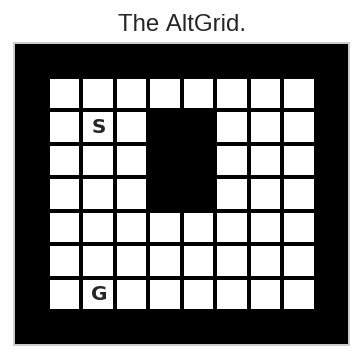

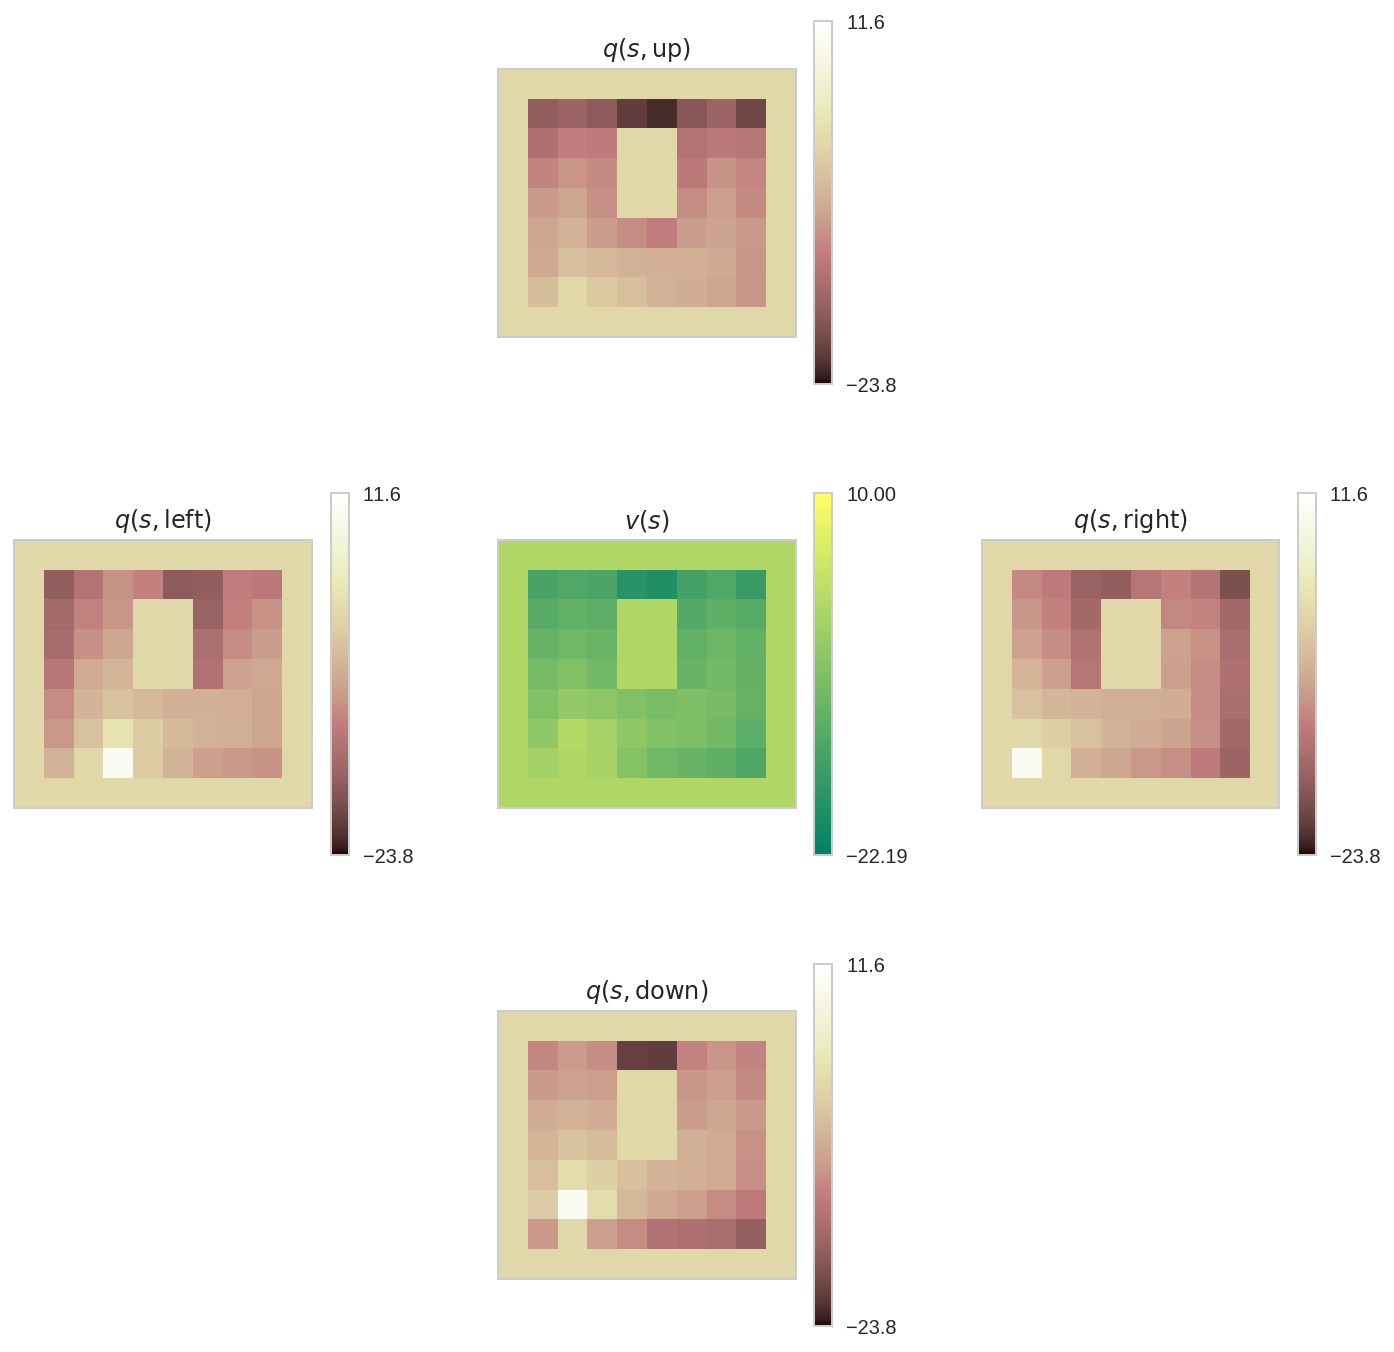

In [7]:
num_steps = int(1e5)  # CHANGE THIS

# environment
grid = AltGrid()

# agent 
agent = PolicyEval_AGENT(
    number_of_states=grid._layout.size, 
    number_of_actions=4, 
    initial_state=grid.get_obs(),
    evaluated_policy=random_policy,
    behaviour_policy=random_policy,
    step_size=0.1
)

# run experiment and get the value functions from agent
run_experiment(grid, agent, num_steps)

# get the q-values
q = agent.q_values.reshape(grid._layout.shape + (4,))

# remember the env
grid.plot_grid()

# visualize value functions
print('AFTER {} STEPS ...'.format(num_steps))
plot_action_values(q, epsilon=1, large=LARGE_PLOT)

### Task 2. Greedy Policy Improvement

Compute and Visualise the greedy policy based on the above evaluation, at the end of the training process for $\texttt{num_steps} = 1e5$.

$$ \pi_{greedy} (a|s) = \arg\max_a Q^{\mu}(s,a) $$

**Q: What do you observe?** Remember that we are evaluating the uniformly random policy.

In [8]:
# Input(s): Q(s,:), epsilon
# Output:   Sampled action based on epsilon-Greedy(Q(s,:))
def epsilon_greedy(q_values, epsilon=0.1):
    pass
    #return the epsilon greedy action

In [9]:
# @title Solution: epilson-greedy policy
def epsilon_greedy(q_values, epsilon=0.1):
    if epsilon < np.random.random():
        return np.argmax(q_values)
    else:
        return np.random.randint(np.array(q_values).shape[-1])

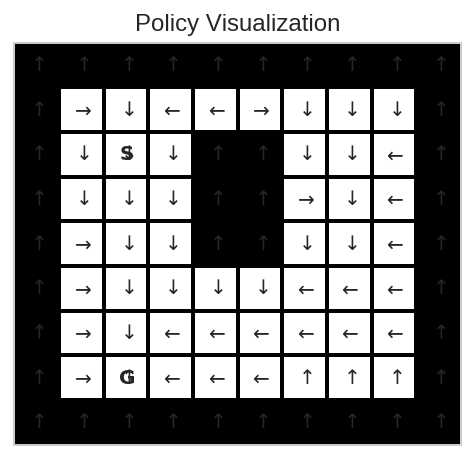

In [10]:
# visualize the greedy policy (whatever works for you, 
# but you should be able to see what the agent would do
# at each step/state)  

pi = np.zeros(grid._layout_dims, dtype=np.int32)
for i in range(grid._layout_dims[0]):
    for j in range(grid._layout_dims[1]):
        pi[i, j] = epsilon_greedy(q[i, j], epsilon=0.)
    
plot_policy(grid, pi, large=LARGE_PLOT)

### Change the Environment 

Re-run the same experiment: policy evaluation agent on the Grid() environment for $\texttt{num_steps} = 1e5$
and visualise the resulting value functions and the greedy policy on top of these values at the end of training.

**Q: What do you observe?**
- How does this policy compare with the optimal one?
- Try running the training process longer -- what do you observe?

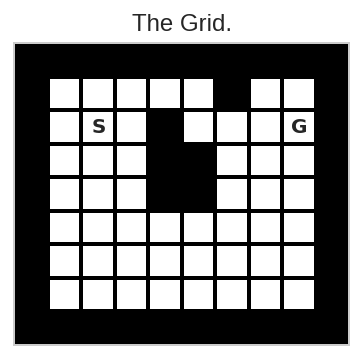

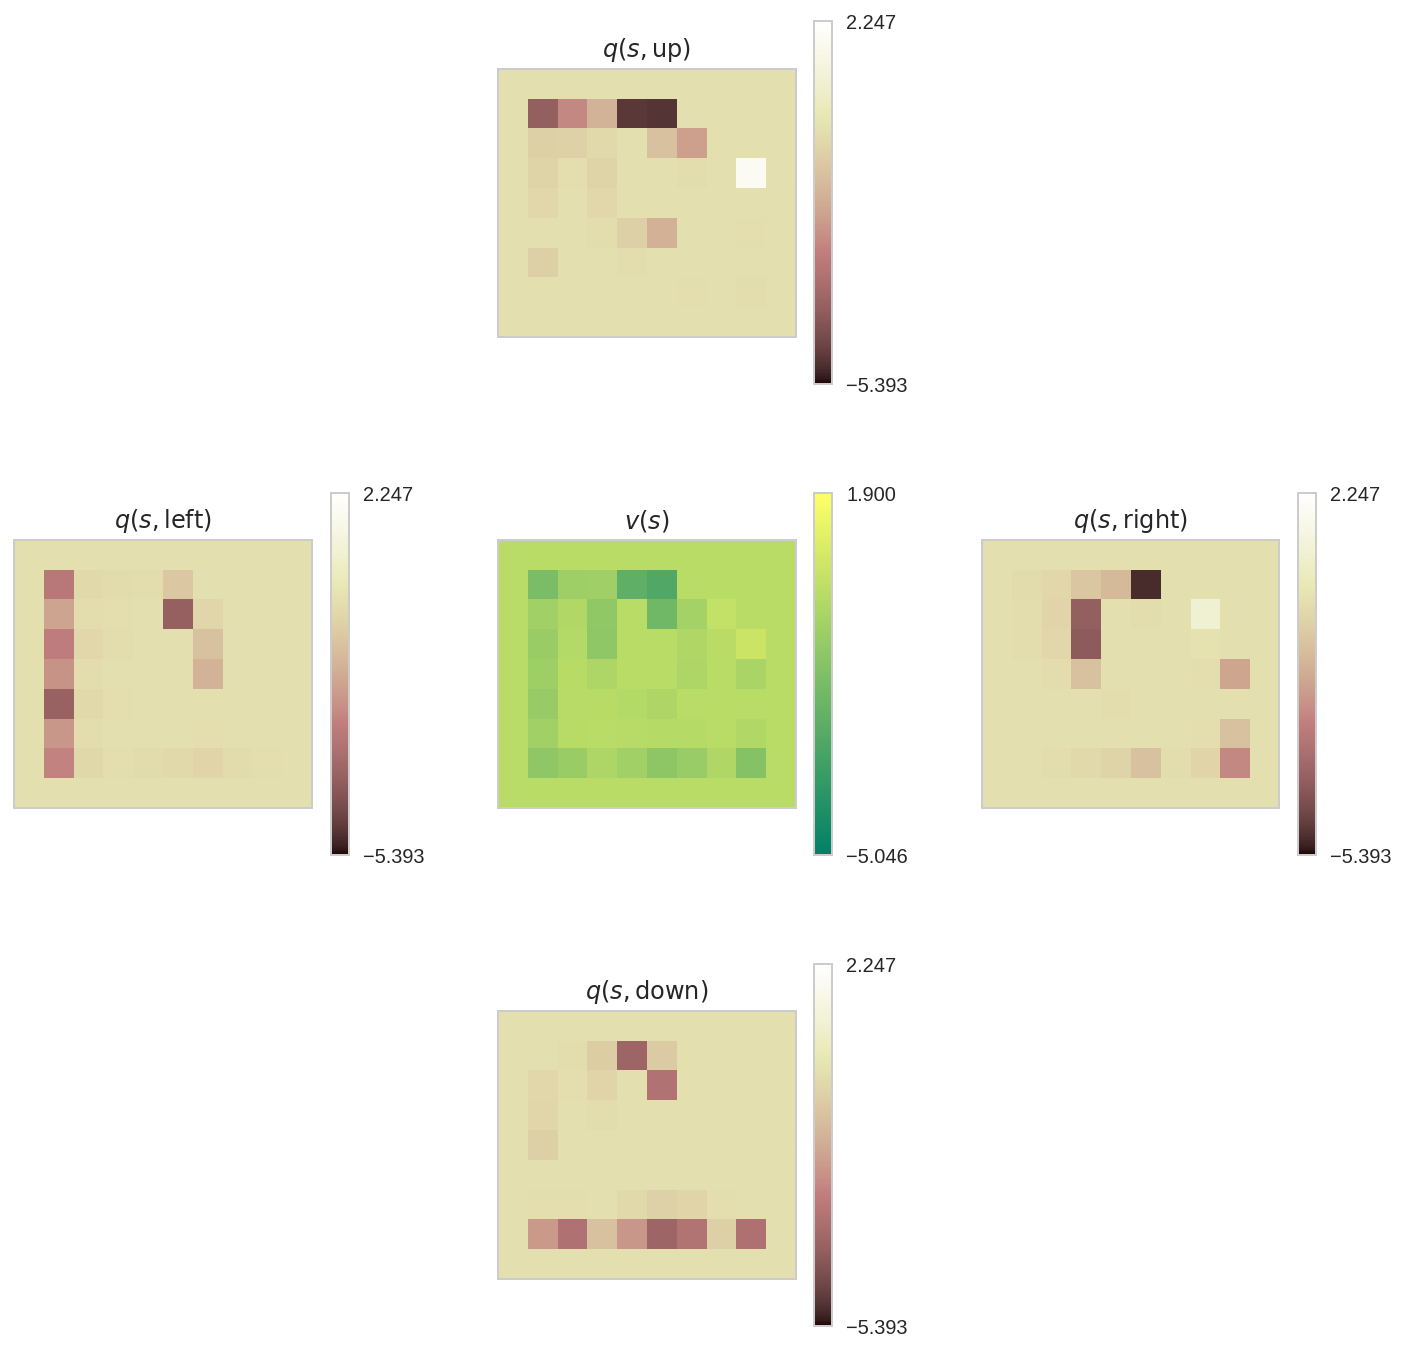

In [11]:
num_steps = int(1e3) # CHANGE THIS

grid = Grid()

agent = PolicyEval_AGENT(
    number_of_states=grid._layout.size, 
    number_of_actions=4, 
    initial_state=grid.get_obs(),
    evaluated_policy=random_policy,
    behaviour_policy=random_policy,
    step_size=0.1)

# run experiment and get the value functions from agent
run_experiment(grid, agent, num_steps)
q = agent.q_values.reshape(grid._layout.shape + (4,))

# remember the env
grid.plot_grid()

# visualise value functions
plot_action_values(q, epsilon=1., large=LARGE_PLOT)

## Part 2. On-policy control. SARSA Agent

In the following we are going to be concern with the control problem -- inferring the optimal value/policy that will 'solve' the MDP. The first algorithm we are going to be looking at is SARSA. 

Note: This is an **on-policy algoritm** -- i.e: the data collection is done on-policy.


**Initialize** $Q(s, a)$ for all s ∈ S and a ∈ A(s)

**Loop forever**:

1. $S \gets{}$current (nonterminal) state
 
2. $A \gets{} \text{current_policy}(S)$
 
3. Take action $A$; observe resultant reward $R$, discount $\gamma$, and state, $S'$

4. $Q(S, A) \gets Q(S, A) + \alpha (R + \gamma Q(S', A') − Q(S, A))$

### Task 3. Implement a SARSA Agent

In [12]:
class SARSA_AGENT:

    def __init__(
        self,
        number_of_states,
        number_of_actions,
        initial_state, 
        behaviour_policy,
        step_size=0.1
    ):
        self._q = np.zeros((number_of_states, number_of_actions))
        self._state = initial_state
        self._number_of_states = number_of_states
        self._number_of_actions = number_of_actions
        self._step_size = step_size
        self._behaviour_policy = behaviour_policy
        self._action = 0
    
    @property
    def q_values(self):
        return self._q

    def step(self, reward, discount, next_state):
        s = self._state
        a = self._action
        r = reward
        g = discount
        next_s = next_state
    
        # ============ YOUR CODE HERE =============
        # Q-value table update
        # td_error =
        # self._q[s, a] =
        pass
  
        # Get the action to send to execute in the environment and return it
        self._state = next_state
        self._action = self._behaviour_policy(self._q[next_state])
    
        return self._action

In [13]:
class SARSA_AGENT:

    def __init__(
        self,
        number_of_states,
        number_of_actions,
        initial_state, 
        behaviour_policy,
        step_size=0.1
    ):
        self._q = np.zeros((number_of_states, number_of_actions))
        self._state = initial_state
        self._number_of_states = number_of_states
        self._number_of_actions = number_of_actions
        self._step_size = step_size
        self._behaviour_policy = behaviour_policy
        self._action = 0
        
    @property
    def q_values(self):
        return self._q

    def step(self, reward, discount, next_state):
        s = self._state
        a = self._action
        r = reward
        g = discount
        next_s = next_state
        next_a = self._behaviour_policy(self._q[next_s])
    
        # Online Q-value update
        td_error = r + g * self._q[next_s, next_a] - self._q[s, a]
        self._q[s, a] += self._step_size * td_error

        # Act
        self._state = next_state
        self._action = self._behaviour_policy(self._q[next_state])
        return self._action

### SARSA agent with different levels of exploration

Run the SARSA agent with different levels of exploration. 

- Moderate exploration: $\texttt{epsilon} = 0.1$. 

- Very exploratory strategy: $\texttt{epsilon} = 0.5, 1.0$.

**Q: Which do you expect**, without running the experiment, to do better?  

 **Run multiple times**: What do you observe? ($\texttt{epsilon} = 0.1$)




AFTER 100000 STEPS ...


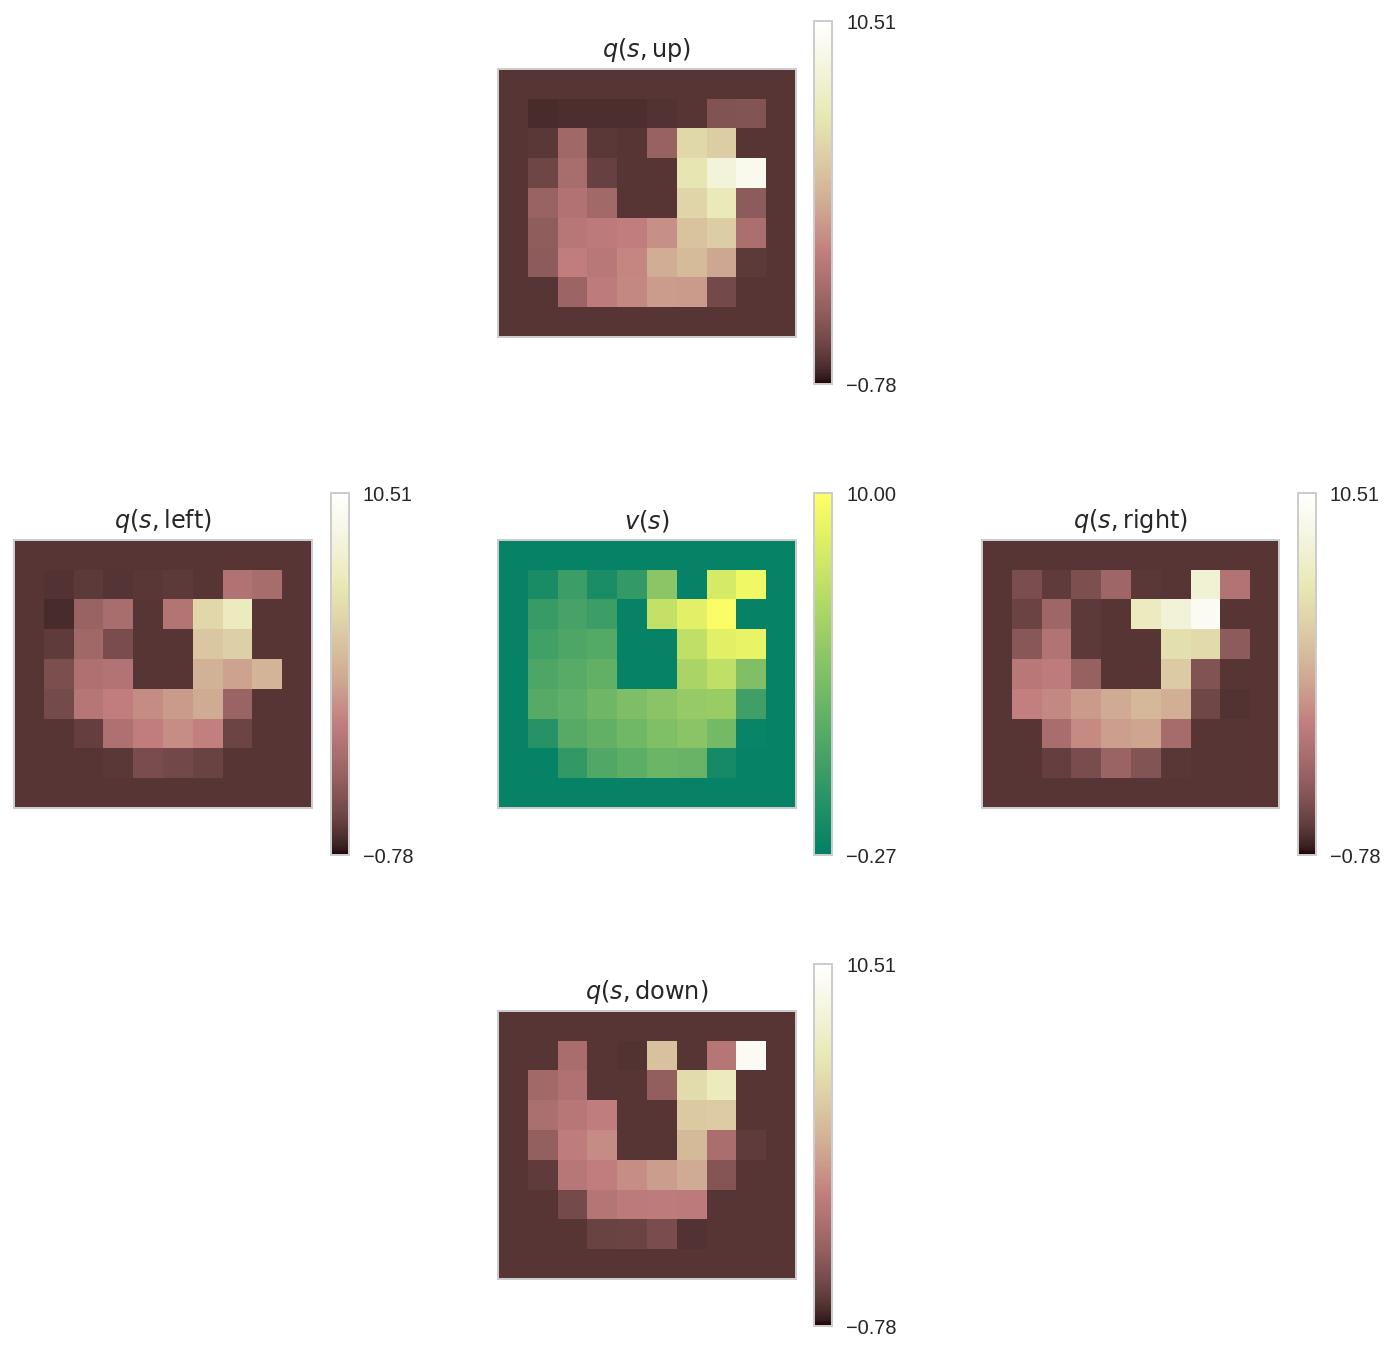

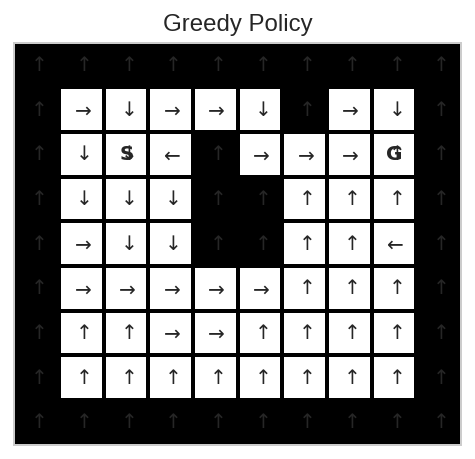

In [14]:
epsilon = 0.1  # CHANGE this
num_steps = int(1e5)

grid = Grid(discount=0.9, penalty_for_walls=-1.)

behavior_policy = lambda qval: epsilon_greedy(qval, epsilon=epsilon)
agent = SARSA_AGENT(
    number_of_states=grid._layout.size, 
    number_of_actions=4, 
    initial_state=grid.get_obs(),
    behaviour_policy=behavior_policy,
    step_size=0.1)

# run experiment and get the value functions from agent
run_experiment(grid, agent, num_steps)
q = agent.q_values.reshape(grid._layout.shape + (4,))

# visualize value functions
print('AFTER {} STEPS ...'.format(num_steps))
plot_action_values(q, epsilon=epsilon, large=LARGE_PLOT)

# visualise the greedy policy
plot_greedy_policy(grid, q, large=LARGE_PLOT)

## Part 3. Off-policy control: Q-learning Agent

Reminder: Q-learning is a very powerful and general algorithm, that enable control (figuring out the optimal policy/value function) both on and off-policy.

**Initialize** $Q(s, a)$ for all s ∈ S and a ∈ A(s)

**Loop forever**:

1. $S \gets{}$current (nonterminal) state
 
2. $A \gets{} \text{behaviour_policy}(S)$
 
3. Take action $A$; observe resultant reward $R$, discount $\gamma$, and state, $S'$

4. $Q(S, A) \gets Q(S, A) + \alpha (R + \gamma \max_a Q(S', a) − Q(S, A))$

### Task 4. Implement a Q-learning Agent

In [15]:
class QLearning_AGENT:

    def __init__(
        self,
        number_of_states,
        number_of_actions,
        initial_state,
        behaviour_policy,
        step_size=0.1
    ):
        self._q = np.zeros((number_of_states, number_of_actions))
        self._state = initial_state
        self._action = 0
        self._number_of_states = number_of_states
        self._number_of_actions = number_of_actions
        self._step_size = step_size
        self._behaviour_policy = behaviour_policy
    
    @property
    def q_values(self):
        return self._q

    def step(self, reward, discount, next_state):
        s = self._state
        a = self._action
        r = reward
        g = discount
        next_s = next_state
        
        # ============ YOUR CODE HERE =============
        
        # Q-value table update
        # td_error =
        # self._q[s, a] =
        pass

        # Act
        self._state = next_state
        self._action = self._behaviour_policy(self._q[next_state])
        return self._action

In [16]:
class QLearning_AGENT:

    def __init__(
        self,
        number_of_states,
        number_of_actions,
        initial_state,
        behaviour_policy,
        step_size=0.1
    ):
        self._q = np.zeros((number_of_states, number_of_actions))
        self._state = initial_state
        self._action = 0
        self._number_of_states = number_of_states
        self._number_of_actions = number_of_actions
        self._step_size = step_size
        self._behaviour_policy = behaviour_policy
    
    @property
    def q_values(self):
        return self._q

    def step(self, reward, discount, next_state):
        s = self._state
        a = self._action
        r = reward
        g = discount
        next_s = next_state
        next_a = self._behaviour_policy(self._q[next_s])
    
        # Online Q-value update
        td_error = r + g * np.max(self._q[next_s]) - self._q[s, a]
        self._q[s, a] += self._step_size * td_error

        # Act
        self._state = next_state
        self._action = self._behaviour_policy(self._q[next_state])
        return self._action

### Q-learning behaviour
Run your Q-learning agent on the below environment for 1e5 number of steps

* The default was $\epsilon=1$, what does this correspond to?
* Try also $\epsilon =0.1, 0.5$. What do you observe? Does the behaviour policy affect the training in any way?

AFTER 300000 STEPS ...


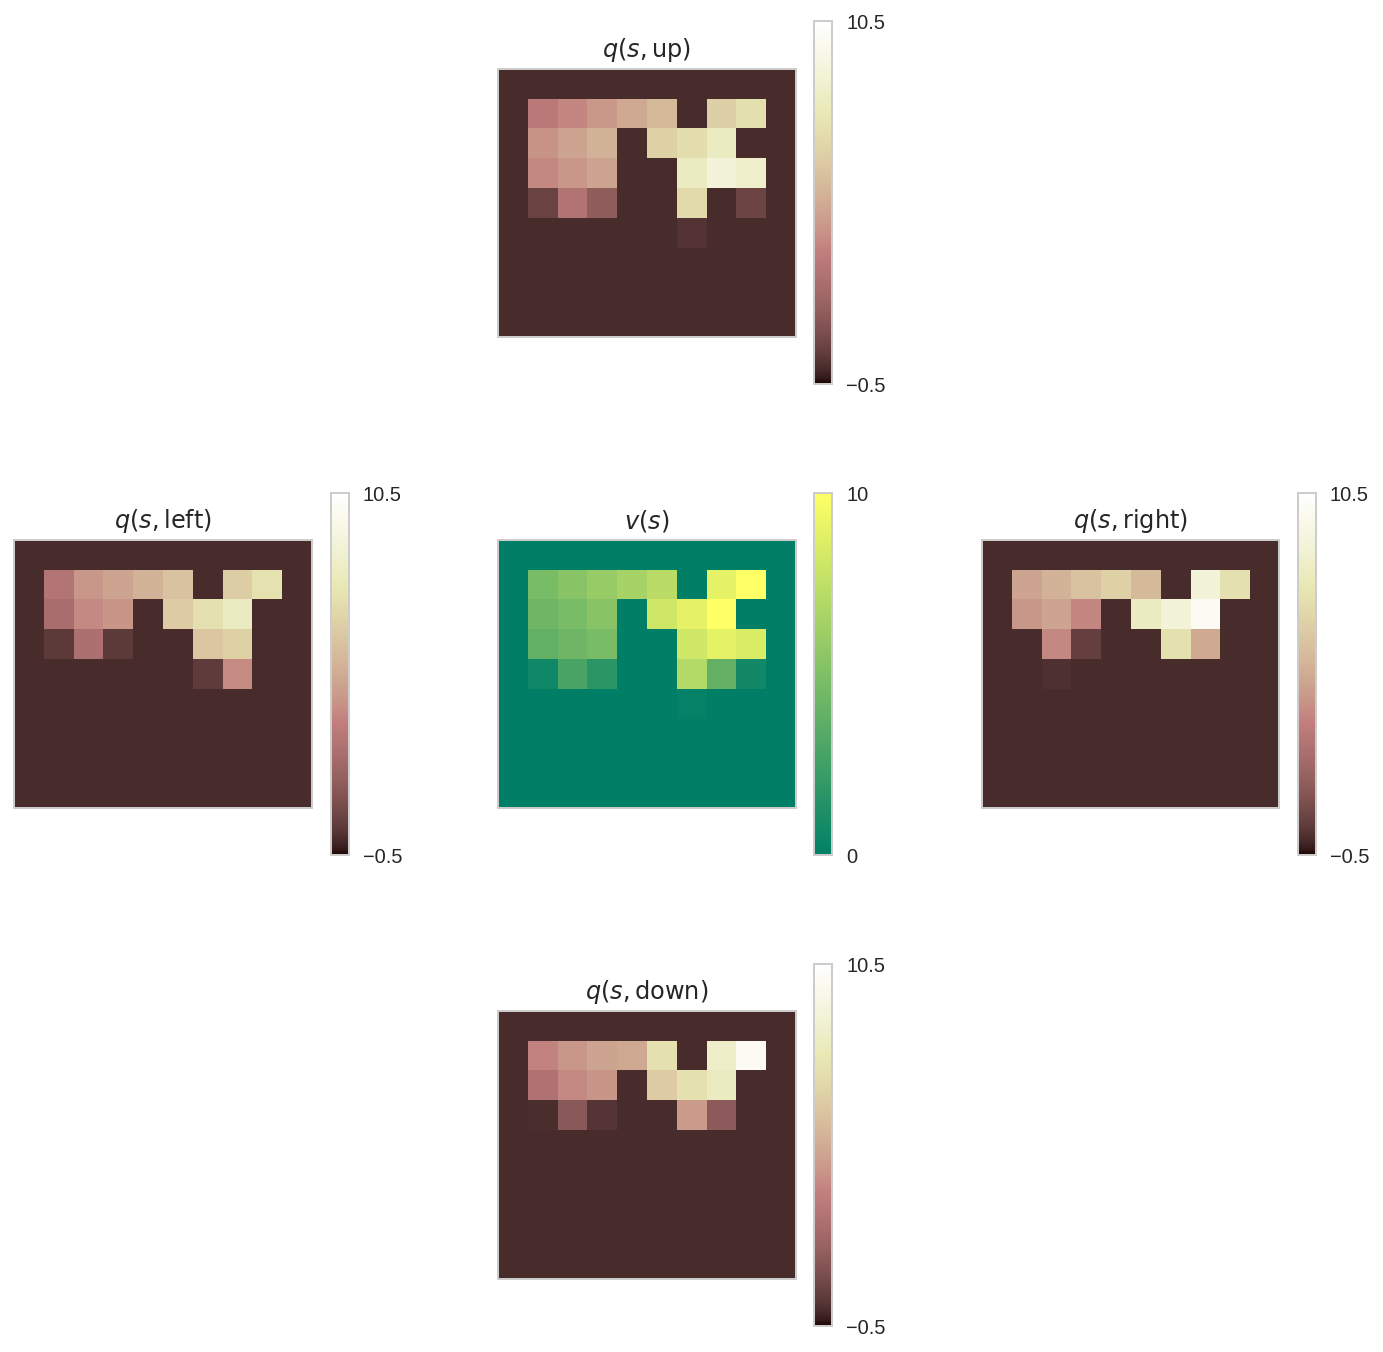

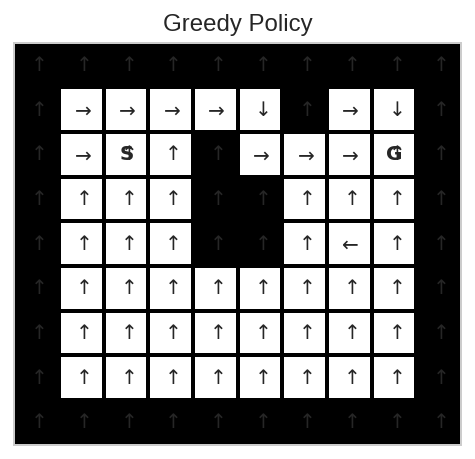

In [17]:
# enviroment
grid = Grid(discount=0.9, penalty_for_walls=-1.)

epsilon = 0.1
num_steps = int(3e5)

# behavior policy
behavior_policy = lambda qval: epsilon_greedy(qval, epsilon=epsilon)

# agent
agent = QLearning_AGENT(
    number_of_states=grid._layout.size, 
    number_of_actions=4, 
    initial_state=grid.get_obs(),
    behaviour_policy=behavior_policy,
    step_size=0.1)

# run experiment and get the value functions from agent
run_experiment(grid, agent, num_steps)
q = agent.q_values.reshape(grid._layout.shape + (4,))

# visualise value functions
print('AFTER {} STEPS ...'.format(num_steps))
plot_action_values(q, epsilon=0., large=LARGE_PLOT)

# visualise the greedy policy
plot_greedy_policy(grid, q, large=LARGE_PLOT)

### SARSA vs Q-learning policies

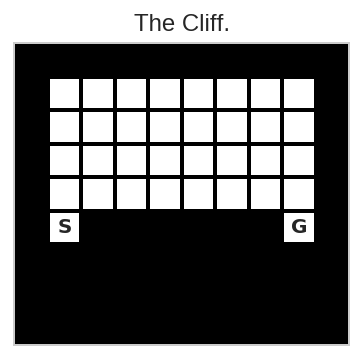

In [18]:
grid = Cliff()
grid.plot_grid()

Remember this environment? Same as above except:
- reward at the bottom is **-100**
- the environment is toxic, with a **-1** reward per step.

In [19]:
epsilon = 0.5
num_steps = int(1e5)

agents = [
    agent(
        number_of_states=grid._layout.size,
        number_of_actions=4,
        initial_state=grid.get_obs(),
        behaviour_policy=behavior_policy,
        step_size=0.1,
    )
    for agent in (SARSA_AGENT, QLearning_AGENT, partial(PolicyEval_AGENT, evaluated_policy=epsilon_greedy))
]

q_values = {}
for agent in agents:
    agent_name = agent.__class__.__name__
    print(f"{agent_name} training")
    
    # init env
    grid = Cliff(discount=1.0)

    behavior_policy = lambda qval: epsilon_greedy(qval, epsilon=epsilon)


    # run experiment and get the value functions from agent
    run_experiment(grid, agent, num_steps)
    q_values[agent_name] = agent.q_values.reshape(grid._layout.shape + (4,))

    # visualize value functions
    print('AFTER {} STEPS ...'.format(num_steps))

SARSA_AGENT training
AFTER 100000 STEPS ...
QLearning_AGENT training
AFTER 100000 STEPS ...
PolicyEval_AGENT training
AFTER 100000 STEPS ...


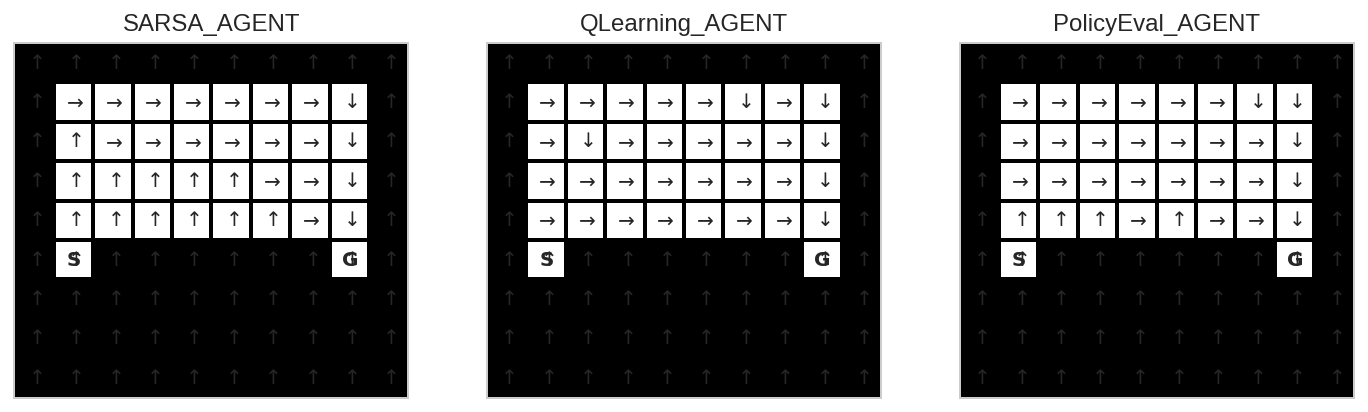

In [20]:
fig, axes = plt.subplots(1, len(agents), figsize=(12, 4))

# visualise the different policies
for (agent_name, q), ax in zip(q_values.items(), axes):
    plot_greedy_policy(grid, q, large=LARGE_PLOT, ax=ax, title=agent_name)

### Bonus! Expected SARSA

**Initialize** $Q(s, a)$ for all s ∈ S and a ∈ A(s)

**Loop forever**:

1. $S \gets{}$current (nonterminal) state
 
2. $A \gets{} \text{behaviour_policy}(S)$
 
3. Take action $A$; observe resultant reward $R$, discount $\gamma$, and state, $S'$

4. $Q(S, A) \gets Q\left(S_{t}, A_{t}\right)+\alpha\left[R_{t+1}+\gamma \sum_{a} \pi\left(a | S_{t+1}\right) Q\left(S_{t+1}, a\right)-Q\left(S_{t}, A_{t}\right)\right]$

In [21]:
class ExpectedSARSA_Agent(SARSA_AGENT):
    def __init__(self, epsilon, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.epsilon = epsilon
    
    def step(self, reward, discount, next_state):
        s = self._state
        a = self._action
        r = reward
        g = discount
        next_s = next_state
        next_a = self._behaviour_policy(self._q[next_s])
    
        # Online Q-value update
        # compute expected target
        N, ϵ = self._number_of_actions, self.epsilon
        
        # ============ YOUR CODE HERE =============
        # qvals
        # pi
        # expectation
        
        # Q-value table update
        # td_error =
        # self._q[s, a] =
        pass

        # Act
        self._state = next_state
        self._action = self._behaviour_policy(self._q[next_state])
        return self._action  

In [22]:
class ExpectedSARSA_Agent(SARSA_AGENT):
    def __init__(self, epsilon, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.epsilon = epsilon
    
    def step(self, reward, discount, next_state):
        s = self._state
        a = self._action
        r = reward
        g = discount
        next_s = next_state
        next_a = self._behaviour_policy(self._q[next_s])
    
        # Online Q-value update
        # compute expected target
        N, ϵ = self._number_of_actions, self.epsilon
        qvals = [self._q[next_s, a_] for a_ in range(N)]
        pi = [1 - epsilon if a == next_a else epsilon / (N-1) for a in range(N)]
        next_qsa = sum([q * pi_a for q, pi_a in zip(qvals, pi)])
        
        # compute td
        td_error = r + g * next_qsa - self._q[s, a]
        self._q[s, a] += self._step_size * td_error

        # Act
        self._state = next_state
        self._action = self._behaviour_policy(self._q[next_state])
        return self._action      

In [23]:
epsilon = 0.6  # CHANGE this
num_steps = int(2e5)

behavior_policy = lambda qval: epsilon_greedy(qval, epsilon=epsilon)

agents = [
    agent(
        number_of_states=grid._layout.size,
        number_of_actions=4,
        initial_state=grid.get_obs(),
        behaviour_policy=behavior_policy,
        step_size=0.1,
    )
    for agent in (SARSA_AGENT, partial(ExpectedSARSA_Agent, epsilon=epsilon), QLearning_AGENT, )
]

q_values = {}
for agent in agents:
    agent_name = agent.__class__.__name__
    print(f"{agent_name} training")
    
    # init env
    grid = Cliff(discount=1.0)
    #grid = Grid(discount=0.9, penalty_for_walls=-1.)

    behavior_policy = lambda qval: epsilon_greedy(qval, epsilon=epsilon)


    # run experiment and get the value functions from agent
    run_experiment(grid, agent, num_steps)
    q_values[agent_name] = agent.q_values.reshape(grid._layout.shape + (4,))

    # visualize value functions
    print('AFTER {} STEPS ...'.format(num_steps))

SARSA_AGENT training
AFTER 200000 STEPS ...
ExpectedSARSA_Agent training
AFTER 200000 STEPS ...
QLearning_AGENT training
AFTER 200000 STEPS ...


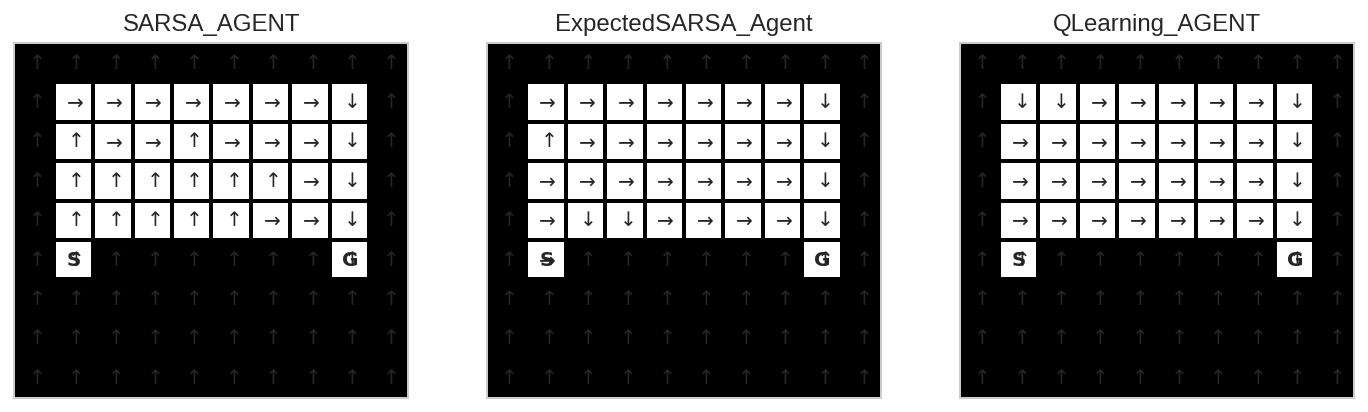

In [24]:
fig, axes = plt.subplots(1, len(agents), figsize=(12, 4))

# visualise the different policies
for (agent_name, q), ax in zip(q_values.items(), axes):
    plot_greedy_policy(grid, q, large=LARGE_PLOT, ax=ax, title=agent_name)